In [3]:
# Importing core libraries
import pandas as pd

df = pd.read_csv("C:/Users/USER/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [6]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing TotalCharges
df.dropna(inplace=True)

# Drop customerID
df.drop('customerID', axis=1, inplace=True)


In [7]:
# Encode binary target column
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df.drop('Churn', axis=1), drop_first=True)

# Features (X) and target (y)
X = df_encoded
y = df['Churn']


In [8]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [10]:
from sklearn.linear_model import LogisticRegression

# Initialize and train
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [11]:
# Predict on test data
y_pred = log_model.predict(X_test)


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8031272210376688

Confusion Matrix:
 [[915 118]
 [159 215]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.7896233120113717

Confusion Matrix:
 [[917 116]
 [180 194]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_

# Match with feature names
feature_names = X_train.columns
feat_importances = pd.Series(importances, index=feature_names)

# Sort
feat_importances = feat_importances.sort_values(ascending=False)


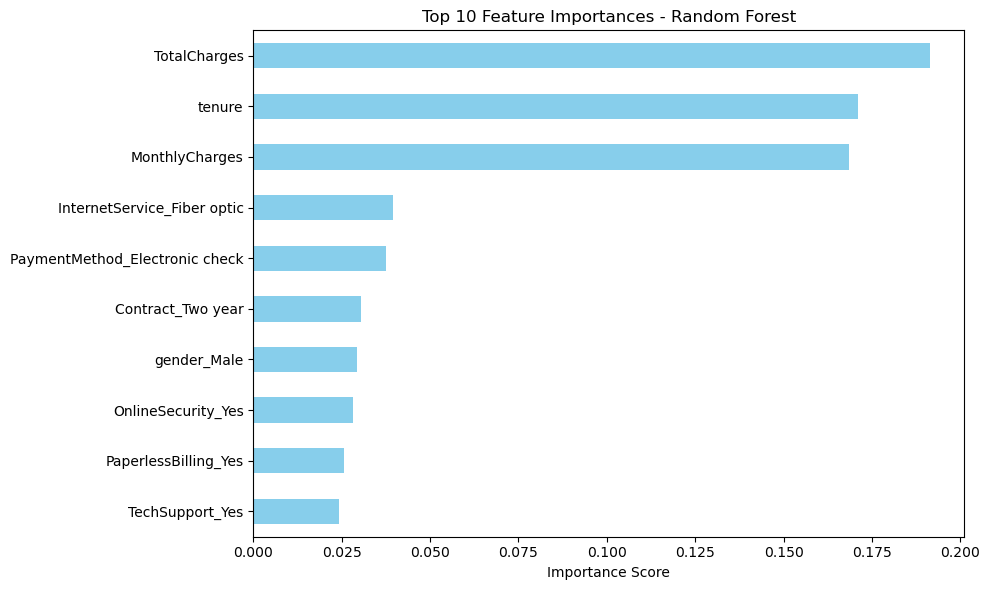

In [16]:
# Plot top 10 important features
plt.figure(figsize=(10,6))
feat_importances[:10].plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()
